In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

Setup the 2006 dataframe

In [2]:
six = pd.read_table("NSDUH_2006_Tab.tsv",sep='\t', header = 0, index_col = 0, low_memory=False)

In [3]:
len(six)

55035

Create the 2006 Class Variable

In [4]:
six["COMB"] = (
    six["PROCODNP"]
    +six["OXYCODP2"]
    +six["HYDCODOP"]
    +six["TRAMADP"])
six["CLASS"] = 0
six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

In [5]:
six.loc[(six["CATAG3"]==4)&(six["CLASS"]==1)]["ANALWT_C"].sum()

2870170.22467075

Select the fields to study 2006 current co-incident drug use

In [6]:

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

Select the fields to study 2006 Demographic effects

In [7]:
six_otherdrug = six.loc[six["CATAG3"]==4,drug_use2006]

In [8]:
six_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALYR,INHYR,TRQYR,STMYR,MTHYR,SEDYR,CLASS
QUESTID2,,,,,,,,,,,,
76775602,0,0,0,0,0,0,0,0,0,0,0,1
79748602,0,1,0,0,0,0,0,0,0,0,0,0
66270602,0,1,0,0,0,0,0,0,0,0,0,0
32480602,1,1,0,0,0,0,0,0,0,0,0,0
40722602,1,1,0,0,0,0,0,0,0,0,0,0


2021 - setup data frame, create CLASS variable, select certain fields for certain studies

In [9]:
tw1 = pd.read_table(
    "NSDUH_2021_Tab.txt",
    sep='\t', 
    header = 0, 
    index_col = 0, 
    low_memory=False)

In [10]:
len(tw1)

58034

In [11]:
tw1["CLASS"] = tw1["OPIANYYR"]

In [12]:
tw1.loc[(tw1["CATAG3"]==4)&(tw1["CLASS"]==1)]["ANALWT_C"].sum()

16721275.946469467

In [13]:
tw1["ANALWT_C"].sum()

279843943.5445435

In [14]:

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [15]:
tw1_otherdrug = tw1.loc[tw1["CATAG3"]==4,drug_use2021]

In [16]:
tw1_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,METHAMYR,SEDANYYR,CLASS
QUESTID2,,,,,,,,,,,,
10002722,1,0,1,0,0,0,0,0,0,0,0,0
10004796,0,1,0,0,0,0,0,0,1,0,0,0
10007045,0,1,0,0,0,0,0,1,0,0,0,1
10008166,0,1,0,0,0,0,0,0,0,0,0,0
10009495,0,1,0,0,0,0,0,0,0,0,1,0


ANALYSIS OF 2006 DATA

In [17]:
six_pop_size = len(six_otherdrug)

In [18]:
six_opium_user = len(six_otherdrug[six_otherdrug["CLASS"]==1])

In [19]:
pct_drug_coinc_2006 = [
    len(six_otherdrug[(six_otherdrug["CLASS"]==1) 
        & (six_otherdrug[x]==1)])/six_opium_user 
    for x in drug_use2006[0:11]]

In [20]:
pct_druguse_overall_2006 = [
    len(six_otherdrug[(six_otherdrug[x]==1)])/six_pop_size 
    for x in drug_use2006]

Analysis of 2021 Data

In [21]:
tw1_pop_size = len(tw1_otherdrug) 

In [22]:
tw1_opium_user = len(tw1_otherdrug[tw1_otherdrug["CLASS"]==1])

In [23]:
pct_drug_coinc_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug["CLASS"]==1) 
        & (tw1_otherdrug[x]==1)])/tw1_opium_user 
    for x in drug_use2021[0:11]]

In [24]:
pct_druguse_overall_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug[x]==1)])/tw1_pop_size 
    for x in drug_use2021]

Visualizing change of usage rates between 2006 to 2021

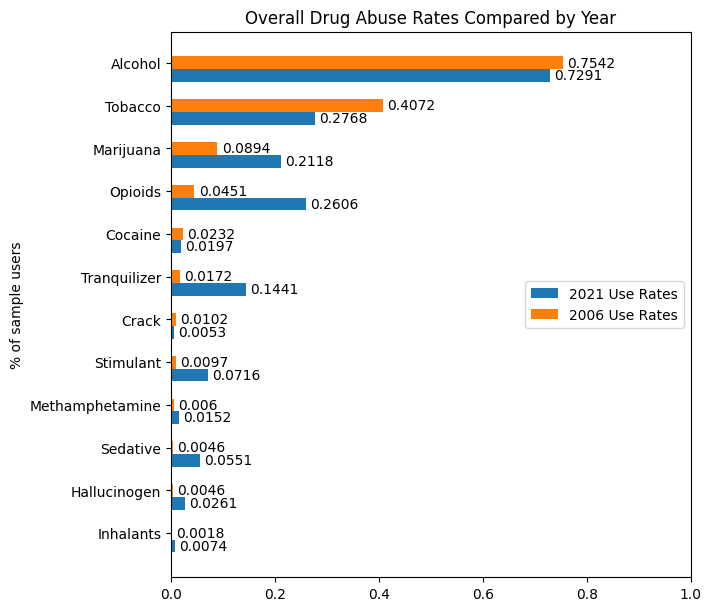

In [25]:
drug_class = ("Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative","Opioids")

drug_class_sorted = list(np.array(drug_class)[np.argsort(pct_druguse_overall_2006)])
use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_druguse_overall_2021)[np.argsort(pct_druguse_overall_2006)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_druguse_overall_2006)[np.argsort(pct_druguse_overall_2006)],4)),
}

x = np.arange(len(drug_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Overall Drug Abuse Rates Compared by Year')
ax.set_yticks(x + width, drug_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

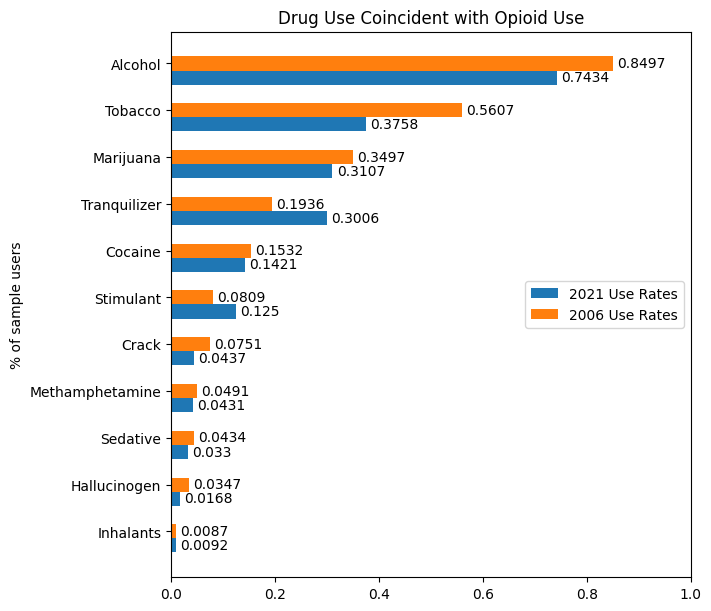

In [26]:


opioid_comp_class = ["Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative"]

opioid_comp_class_sorted = list(np.array(opioid_comp_class)[np.argsort(pct_drug_coinc_2006)])

use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_drug_coinc_2021)[np.argsort(pct_drug_coinc_2021)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_drug_coinc_2006)[np.argsort(pct_drug_coinc_2006)],4)),
}

x = np.arange(len(opioid_comp_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Drug Use Coincident with Opioid Use')
ax.set_yticks(x + width, opioid_comp_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

In [27]:
age_use2006 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALAGE',
               'IRINHAGE','IRTRNAGE','IRSTMAGE',
               'IRMTHAGE','IRSEDAGE','CLASS'
              ]
#Alcohol, Tobacco, Marijuana, Tranquilizer, 
#Cocaine, Stimulant, Crack, Methamphetamine, 
#Sedative, Hallucinogen, Inhalants

In [28]:
age_use2021 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALLUCAGE',
               'IRINHALAGE','IRMETHAMAGE','IRTRQNMAGE',
               'IRSTMNMAGE','IRSEDNMAGE','CLASS'
              ]

In [29]:
six_ageuse = six.loc[six["CATAG3"]==4,age_use2006]
tw1_ageuse = tw1.loc[tw1["CATAG3"]==4,age_use2021]

In [30]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr))*stdev

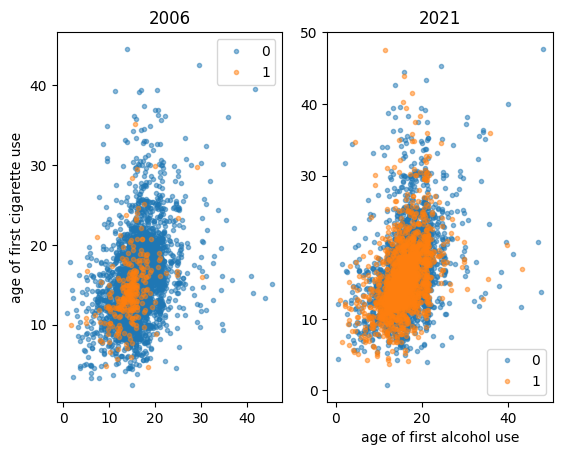

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRCIGAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRCIGAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.5)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.5)
    

ax1.set_ylabel('age of first cigarette use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

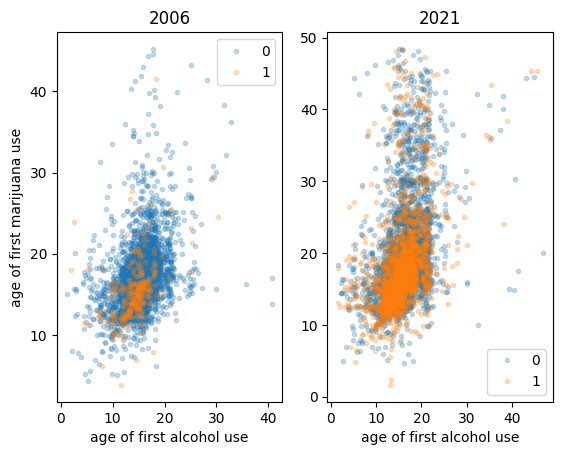

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRMJAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRMJAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first marijuana use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

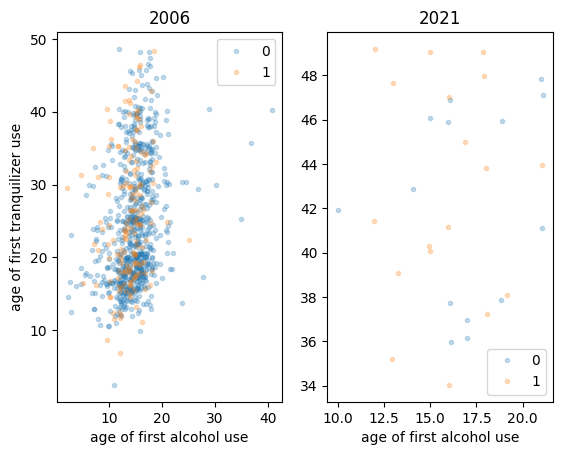

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRTRNAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRTRQNMAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRNAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRQNMAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first tranquilizer use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

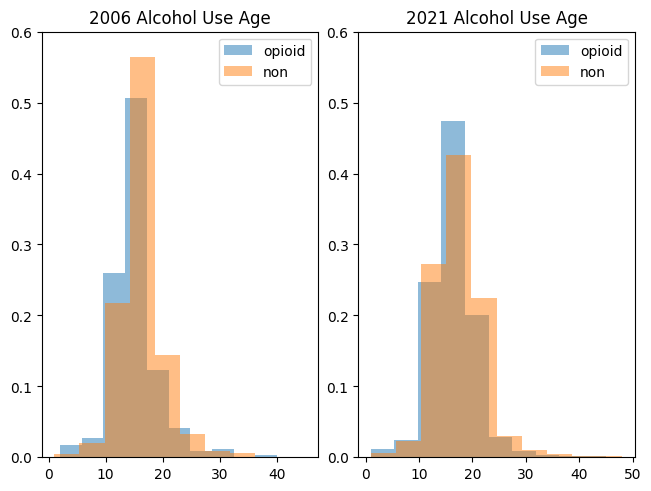

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==1),'IRALCAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==1),'IRALCAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Alcohol Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Alcohol Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

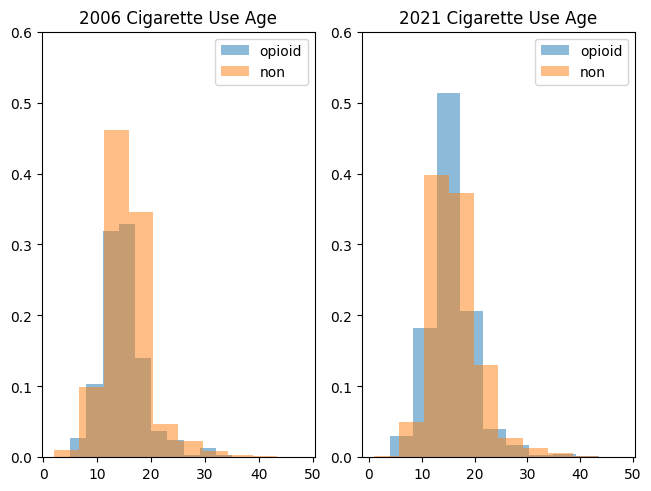

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==1),'IRCIGAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==1),'IRCIGAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Cigarette Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Cigarette Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

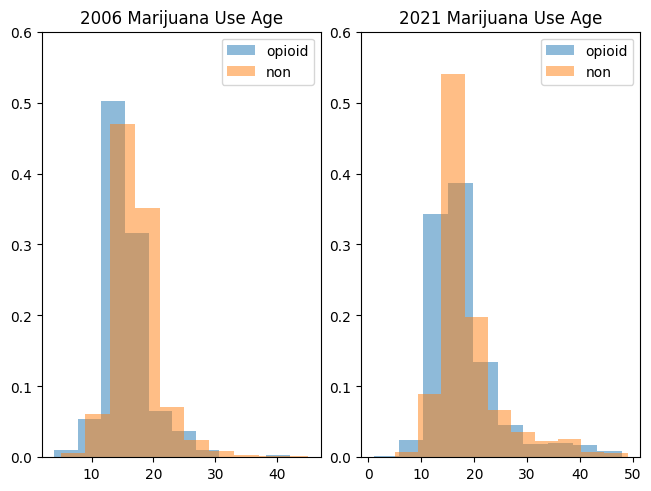

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==1),'IRMJAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==1),'IRMJAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Marijuana Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Marijuana Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

DEMOGRAPHIC DATA EXPLORATION

In [37]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

In [38]:
six_demo = six.loc[six["CATAG3"]==4,demo2006]
tw1_demo = tw1.loc[tw1["CATAG3"]==4,demo2021]

In [39]:
len(six_demo)

7665

In [40]:
len(tw1_demo)

12561

In [41]:
six_user_len = len(six_demo[six_demo["CLASS"]==1])
six_user_len

346

In [42]:
tw1_user_len = len(tw1_demo[tw1_demo["CLASS"]==1])
tw1_user_len

3273

IN-PATIENT MENTAL HEALTH TREATMENT

In [43]:
tw1_treat_count = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].count()[0]
six_treat = six_demo.loc[(six_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/six_user_len
tw1_treat = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/tw1_treat_count

In [44]:
d = {2006:[x for x in six_treat],2021:[x for x in tw1_treat]}
treat = pd.DataFrame(data=d,index=["Yes","No"])

<Axes: title={'center': 'PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR'}>

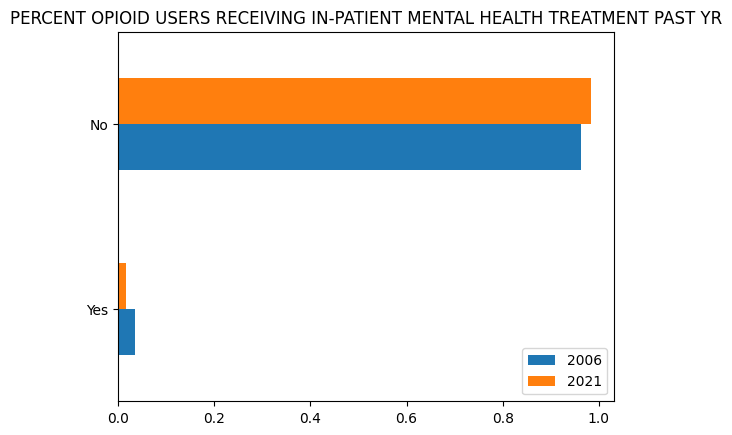

In [45]:
treat.plot.barh(title="PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR")

SEVERE PSYCHOLOGICAL DISTRESS

In [46]:
six_psych = six_demo.loc[(six_demo["CLASS"]==1),["SPDYRADJ"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_psych = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SPDPSTYR"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [47]:
d = {2006:[x for x in six_psych],2021:[x for x in tw1_psych]}
psych = pd.DataFrame(data=d,index=["No","Yes"])

<Axes: title={'center': 'PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR'}>

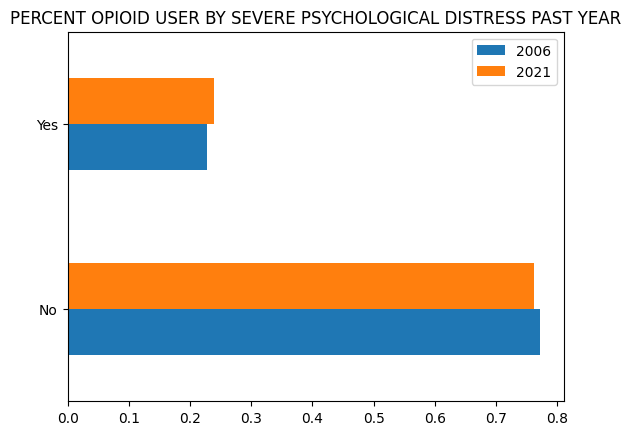

In [48]:
psych.plot.barh(title="PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR")

MAJOR DEPRESSIVE EPISODE

In [49]:
six_depress = six_demo.loc[(six_demo["CLASS"]==1),["AJAMDEYR"]].value_counts().sort_index()/six_user_len
tw1_depress = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRAMDEYR"]].value_counts().sort_index()/tw1_user_len

In [50]:
d = {2006:[x for x in six_depress],2021:[x for x in tw1_depress]}
depress = pd.DataFrame(data=d,index=["No","Yes"])

In [51]:
depress

,2006,2021
No,0.176301,0.857012
Yes,0.812139,0.142988


<Axes: title={'center': 'PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR'}>

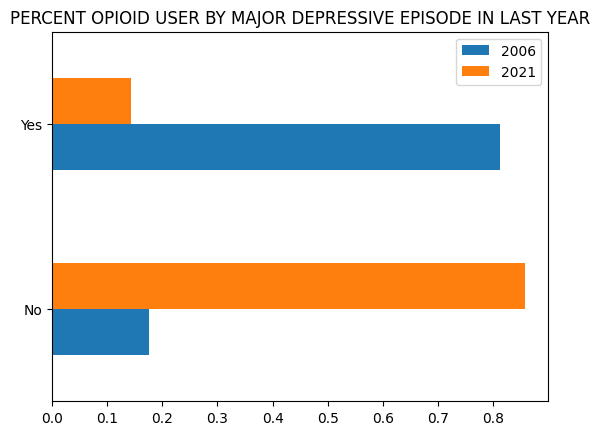

In [52]:
depress.plot.barh(title="PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR")

MARITAL STATUS

In [53]:
six_married = six_demo.loc[(six_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_married = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [54]:
d = {2006:[x for x in six_married],2021:[x for x in tw1_married]}
married = pd.DataFrame(data=d,index=["Married","Widowed","Divorced/Separated","Never Married"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY MARITAL STATUS'}>

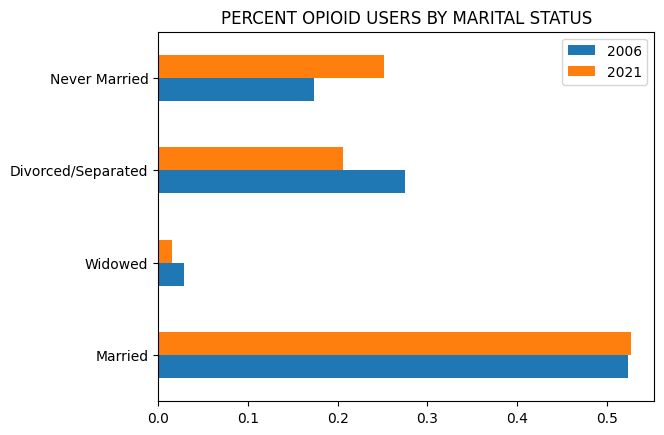

In [55]:
married.plot.barh(title="PERCENT OPIOID USERS BY MARITAL STATUS")

OVERALL HEALTH CONDITION

In [56]:
six_health = six_demo.loc[(six_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/six_user_len
tw1_health = tw1_demo.loc[(tw1_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/tw1_user_len

In [57]:
d = {2006:[x for x in six_health],2021:[x for x in tw1_health]}
health = pd.DataFrame(data=d,index=["Excellent","Very Good","Good","Fair/Poor"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL'}>

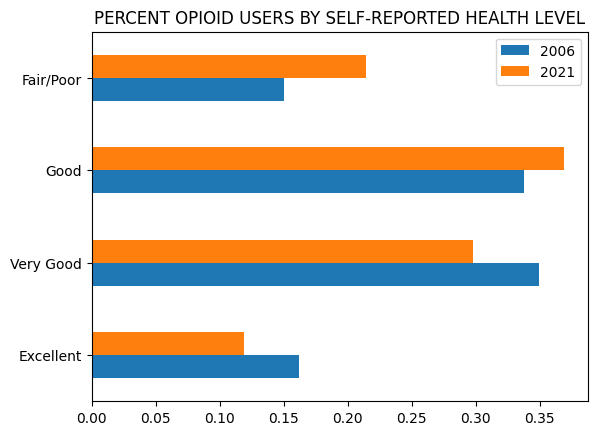

In [58]:
health.plot.barh(title="PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL")

EMPLOYMENT

In [59]:
six_employment = six_demo.loc[(six_demo["CLASS"]==1),["EMPSTATY"]].value_counts().sort_index()/six_user_len
tw1_employment = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRWRKSTAT"]].value_counts().sort_index()/tw1_user_len

In [60]:
d = {2006:[x for x in six_employment],2021:[x for x in tw1_employment]}
employment = pd.DataFrame(data=d,index=["FULL TIME","PART TIME","UNEMPLOYED","OTHER"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EMPLOYMENT STATUS'}>

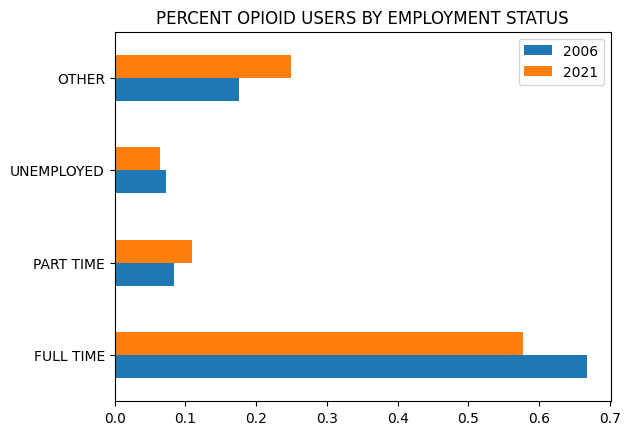

In [61]:
employment.plot.barh(title="PERCENT OPIOID USERS BY EMPLOYMENT STATUS")

EDUCATION

In [62]:
six_educate = six_demo.loc[(six_demo["CLASS"]==1),["EDUCCAT2"]].value_counts().sort_index()/six_user_len
tw1_educate = tw1_demo.loc[(tw1_demo["CLASS"]==1),["EDUHIGHCAT"]].value_counts().sort_index()/tw1_user_len

In [63]:
d = {2006:[x for x in six_educate],2021:[x for x in tw1_educate]}
educate = pd.DataFrame(data=d,index=["SOME HS","HS GRAD","SOME COLLEGE","COLLEGE GRAD"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EDUCATION LEVEL'}>

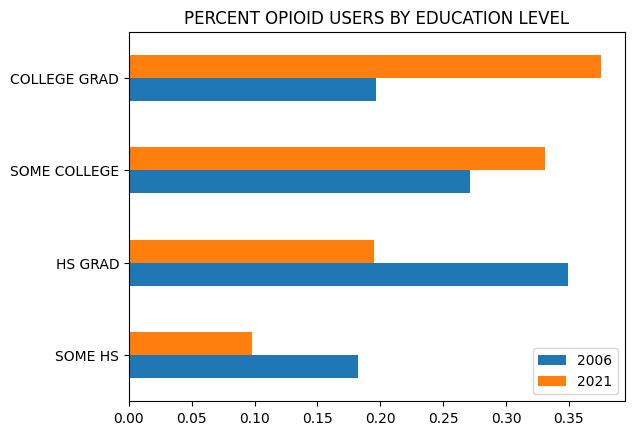

In [64]:
educate.plot.barh(title="PERCENT OPIOID USERS BY EDUCATION LEVEL")

GENDER AND RACE

In [65]:
six_sexrace = six_demo.loc[(six_demo["CLASS"]==1),["SEXRACE"]].value_counts().sort_index()/six_user_len
tw1_sexrace = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SEXRACE"]].value_counts().sort_index()/tw1_user_len

In [66]:
d = {2006:[x for x in six_sexrace],2021:[x for x in tw1_sexrace]}
sexrace = pd.DataFrame(data=d,index=["White Male",
                                     "White Female",
                                     "Black Male",
                                     "Black Female",
                                     "Hispanic Male",
                                     "Hispanic Female",
                                     "Other"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RACE/GENDER'}>

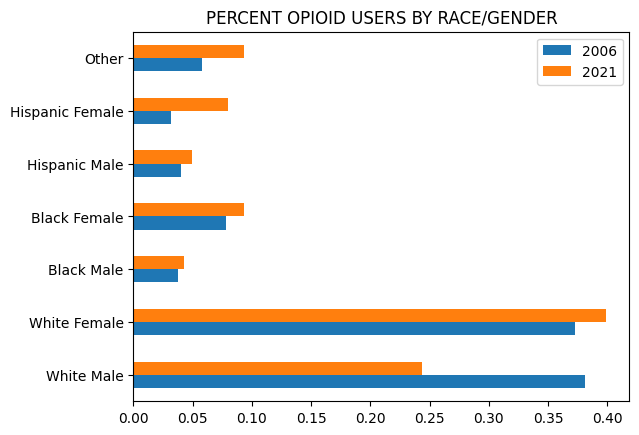

In [67]:
sexrace.plot.barh(title="PERCENT OPIOID USERS BY RACE/GENDER")

POVERTY

In [68]:
six_poverty = six_demo.loc[(six_demo["CLASS"]==1),["POVERTY2"]].value_counts().sort_index()/six_user_len
tw1_poverty = tw1_demo.loc[(tw1_demo["CLASS"]==1),["POVERTY3"]].value_counts().sort_index()/tw1_user_len

In [69]:
d = {2006:[x for x in six_poverty],2021:[x for x in tw1_poverty]}
poverty = pd.DataFrame(data=d,index=["Poverty","2xPoverty",">2xPoverty"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY POVERTY LEVEL'}>

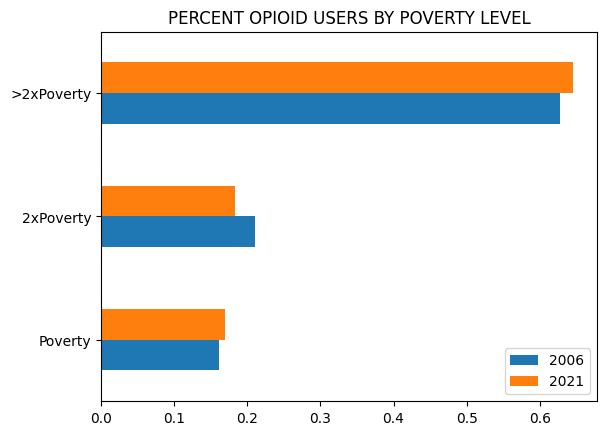

In [70]:
poverty.plot.barh(title="PERCENT OPIOID USERS BY POVERTY LEVEL")

GENDER

In [71]:
six_gender = six_demo.loc[(six_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/six_user_len
tw1_gender = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/tw1_user_len

In [72]:
d = {2006:[x for x in six_gender],2021:[x for x in tw1_gender]}
gender = pd.DataFrame(data=d,index=["Male","Female"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY GENDER'}>

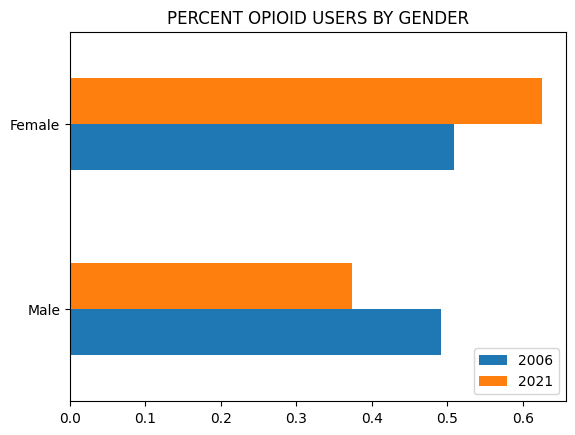

In [73]:
gender.plot.barh(title="PERCENT OPIOID USERS BY GENDER")

RECEIVE GOVERNMENT ASSISTANCE

In [74]:
six_govtprog = six_demo.loc[(six_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/six_user_len
tw1_govtprog = tw1_demo.loc[(tw1_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/tw1_user_len

In [75]:
d = {2006:[x for x in six_govtprog],2021:[x for x in tw1_govtprog]}
income = pd.DataFrame(data=d,index=["receive","do not receive"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE'}>

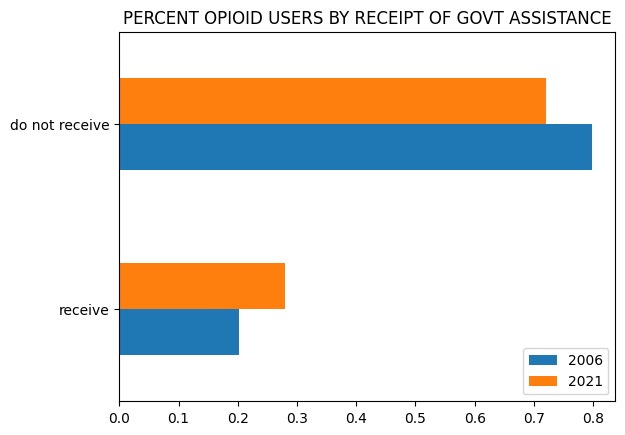

In [76]:
income.plot.barh(title="PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE")

INCOME

In [77]:
six_income = six_demo.loc[(six_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/six_user_len

In [78]:
tw1_income = tw1_demo.loc[(tw1_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/tw1_user_len

In [79]:
d = {2006:[x for x in six_income],2021:[x for x in tw1_income]}
income = pd.DataFrame(data=d,index=["<20K","20K-49K","50K-75K",">75K"])

<Axes: title={'center': 'PERCENT OF OPIOID USERS BY INCOME BRACKET'}>

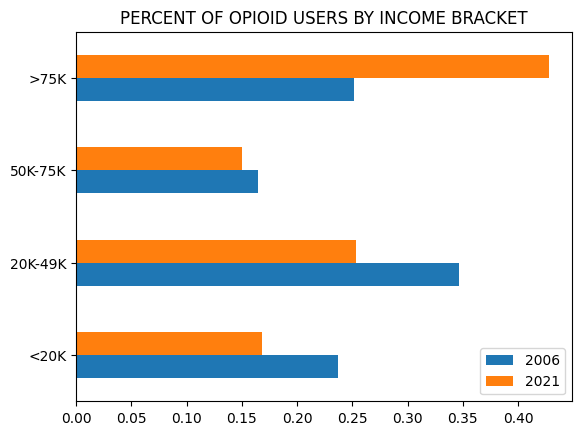

In [80]:
income.plot.barh(title='PERCENT OF OPIOID USERS BY INCOME BRACKET')

CORRELATION HEAT MAP

In [81]:
np.set_printoptions(precision=2,suppress=True)

In [82]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [83]:
dm_regnames = ['welfare','income','poverty','gender-race','education level','employment',
            'health','marital status','major depression ep','severe psych distress','mental health hospitalization']

du_regnames = ['tobacco','alcohol','marijuana','cocaine','crack','hallucinogens','inhalants','tranquilizer',
            'stimulant','methamphetamines','sedatives']
            
dm_corrlist_2006 = ['GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2','EMPSTATY',
                    'HEALTH2','IRMARIT','AJAMDEYR','SPDYRADJ','AMHINP2']

du_corrlist_2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR",
                    "STMYR","MTHYR","SEDYR"]

dm_corrlist_2021 = ['GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT','IRWRKSTAT',
                    'HEALTH2','IRMARIT','IRAMDEYR','SPDPSTYR','AMHINP2']

du_corrlist_2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR",
                    "TRQANYYR","STMANYYR","METHAMYR","SEDANYYR"]

dm_corrdf_2006 = six.loc[six["CATAG3"]==4,dm_corrlist_2006]
du_corrdf_2006 = six.loc[six["CATAG3"]==4,du_corrlist_2006]
dm_corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,dm_corrlist_2021]
du_corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,du_corrlist_2021]

In [84]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%c3%a9rs-coefficient-matrix
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [85]:
def corrmat(dataframe):
    colname = dataframe.columns.values.tolist()
    cols = len(colname)
    mat = np.empty([cols,cols])
    for x in range(cols):
        for y in range(x+1,cols):
            confusion_matrix = pd.crosstab(dataframe[colname[x]],dataframe[colname[y]]).to_numpy()
            corrval = round(cramers_corrected_stat(confusion_matrix),2)
            #print(corrval)
            mat[x,y]=round(corrval,2)
    return np.triu(mat,k=1)
            

In [86]:
def heatmap(data,year,regnames):
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    
    fig.set_size_inches(10,10)
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(regnames)), labels=regnames)
    ax.set_yticks(np.arange(len(regnames)), labels=regnames)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(regnames)):
        for j in range(len(regnames)):
            text = ax.text(j, i, data[i, j],
                           ha="center", va="center", color="w", fontsize='large')
    
    ax.set_title(f"Correlation Heatmap of Selected Fields from {year} NSDUH Survey")
    #fig.tight_layout()
    plt.show()

In [87]:
dm_data2006 = corrmat(dm_corrdf_2006)
du_data2006 = corrmat(du_corrdf_2006)

dm_data2021 = corrmat(dm_corrdf_2021)
du_data2021 = corrmat(du_corrdf_2021)


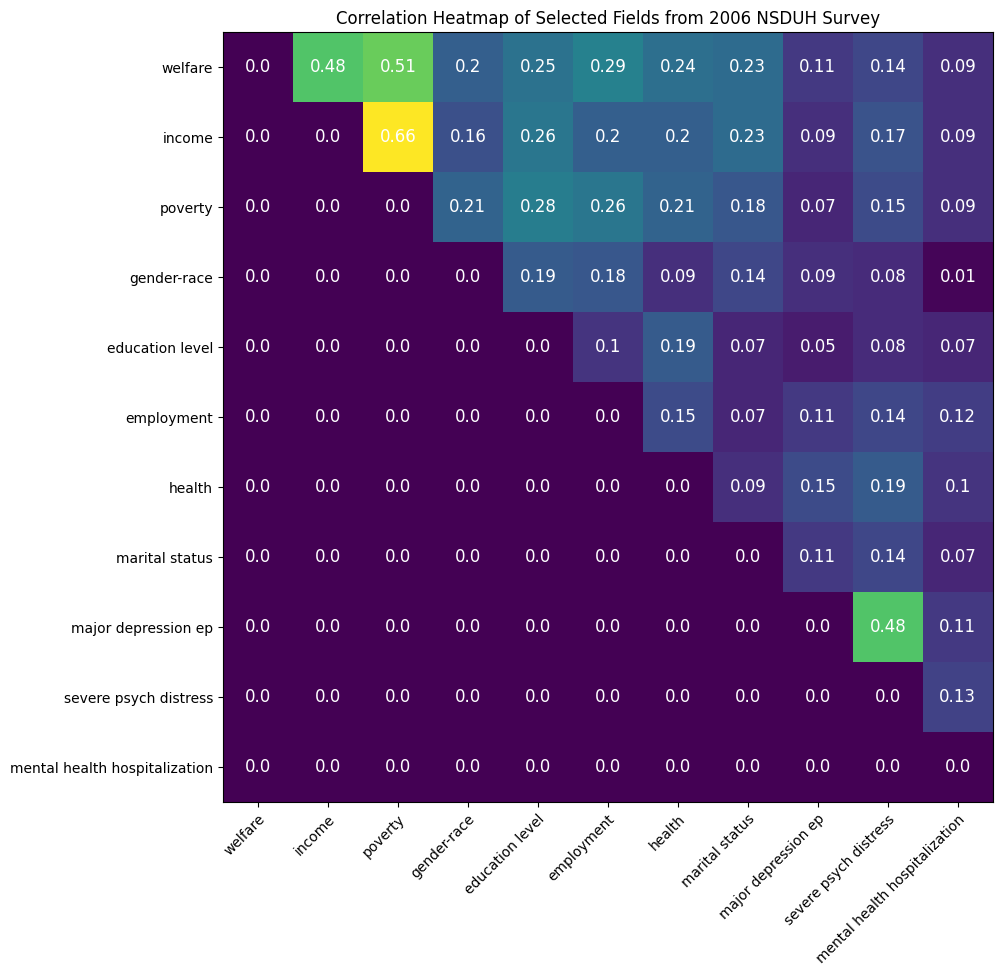

In [88]:
heatmap(dm_data2006,2006,dm_regnames)

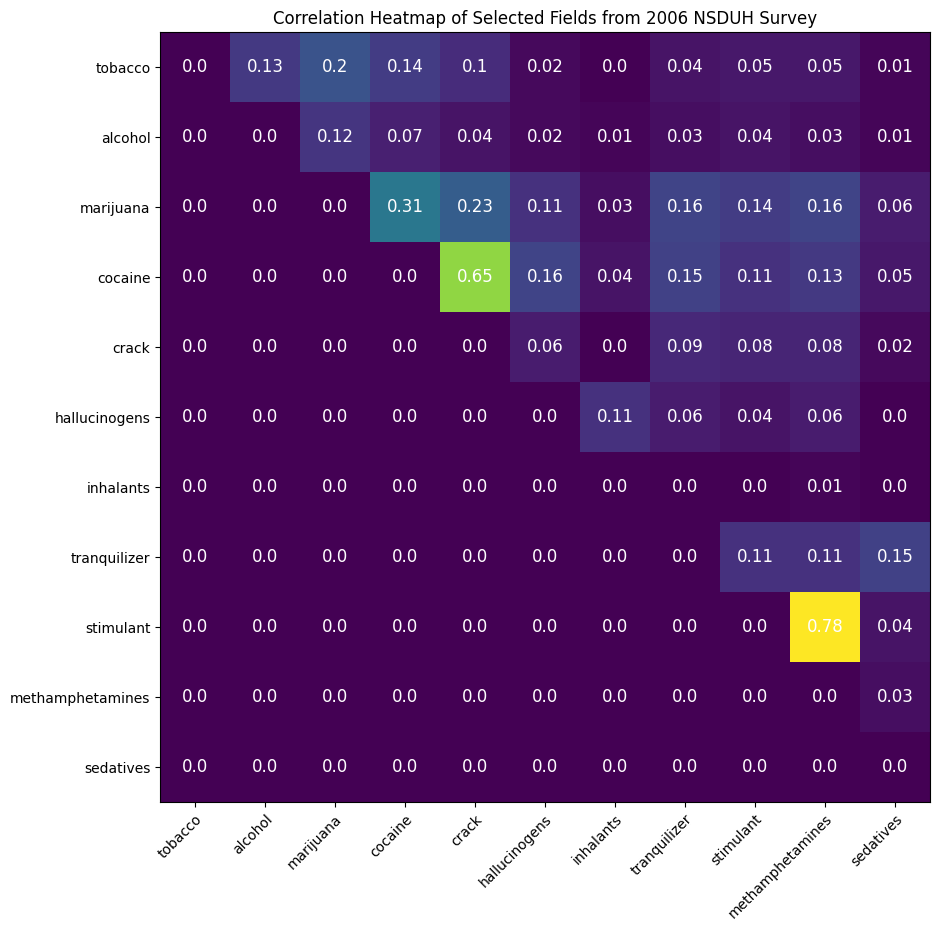

In [89]:
heatmap(du_data2006,2006,du_regnames)

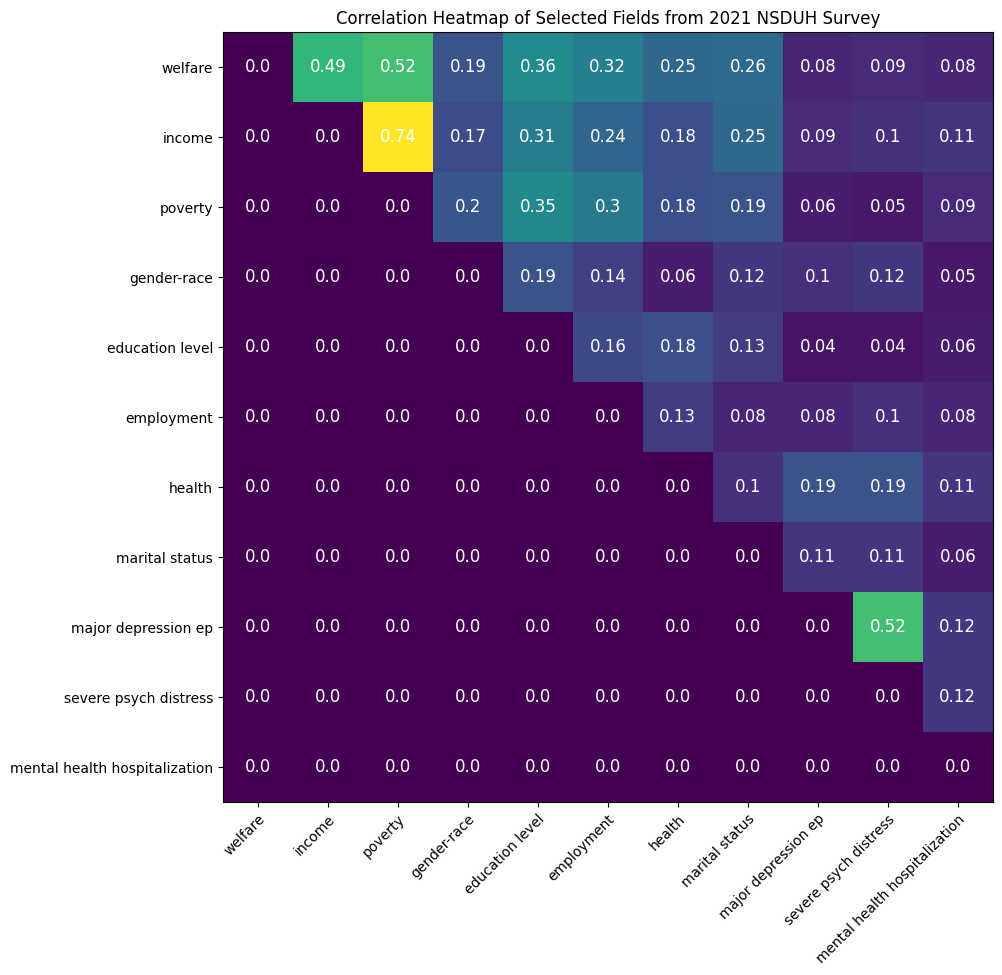

In [90]:
heatmap(dm_data2021,2021,dm_regnames)

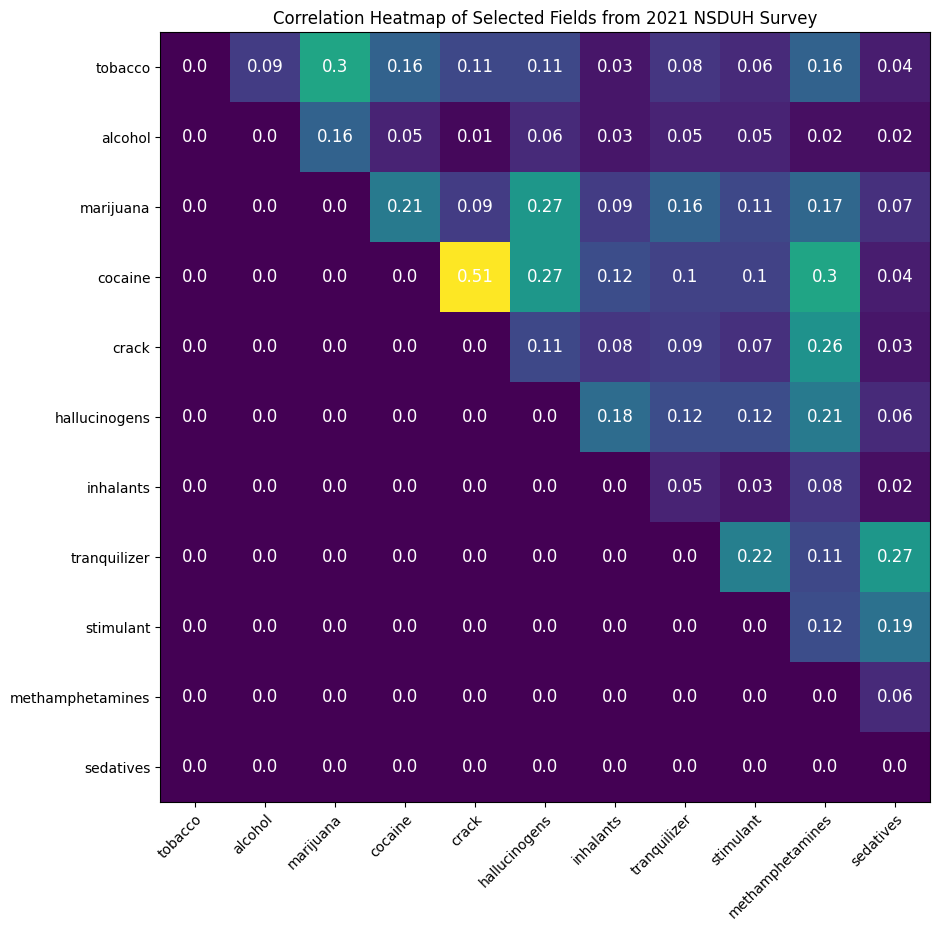

In [91]:
heatmap(du_data2021,2021,du_regnames)

Now to create the machine learning models

Import the needed packages from sklearn

In [92]:
from collections import Counter

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression

#DECISION BOUNDARY PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Set up the 4 dataframes with the finally selected variables based on results of the correlation heat map

In [93]:
#2006 drug use
du_six_final = ["TOBYR","ALCYR","MRJYR","COCYR","HALYR","INHYR","TRQYR","STMYR","SEDYR"]
#2021 drug use
du_tw1_final = ["TOBYR","ALCYR","MRJYR","COCYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
                "SEDANYYR"]

#2006 demographics
dm_six_final = ["INCOME","SEXRACE","EDUCCAT2","EMPSTATY","HEALTH2","IRMARIT","AJAMDEYR","AMHINP2"]
#2021 demographics
dm_tw1_final = ['INCOME','SEXRACE','EDUHIGHCAT','IRWRKSTAT','HEALTH2','IRMARIT','IRAMDEYR',"AMHINP2"]


In [94]:
du_six_X = six.loc[six["CATAG3"]==4,du_six_final].astype('category')
du_six_y = six.loc[six["CATAG3"]==4,"CLASS"].astype('category')

dm_six_X = six.loc[six["CATAG3"]==4,dm_six_final].astype('category')
dm_six_y = six.loc[six["CATAG3"]==4,"CLASS"].astype('category')

du_tw1_X = tw1.loc[tw1["CATAG3"]==4,du_tw1_final].astype('category')
du_tw1_y = tw1.loc[tw1["CATAG3"]==4,"CLASS"].astype('category')

dm_tw1_X = tw1.loc[tw1["CATAG3"]==4,dm_tw1_final].astype('category')
dm_tw1_y = tw1.loc[tw1["CATAG3"]==4,"CLASS"].astype('category')

In [95]:
for x in du_six_final:
    print(x,": ",set(du_six_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALYR :  {0, 1}
INHYR :  {0, 1}
TRQYR :  {0, 1}
STMYR :  {0, 1}
SEDYR :  {0, 1}


In [96]:
for x in du_tw1_final:
    print(x,": ",set(du_tw1_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALLUCYR :  {0, 1}
INHALYR :  {0, 1}
TRQANYYR :  {0, 1}
STMANYYR :  {0, 1}
SEDANYYR :  {0, 1}


In [97]:
for x in dm_six_final:
    print(x,": ",set(dm_six_X[x].tolist()))

INCOME :  {1, 2, 3, 4}
SEXRACE :  {1, 2, 3, 4, 5, 6, 7}
EDUCCAT2 :  {1, 2, 3, 4}
EMPSTATY :  {1, 2, 3, 4}
HEALTH2 :  {1.0, 2.0, 3.0, 4.0, nan, nan, nan, nan}
IRMARIT :  {1, 2, 3, 4}
AJAMDEYR :  {1.0, 2.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
AMHINP2 :  {1.0, 2.0, nan, nan, nan, nan, nan, nan, nan}


In [98]:
for x in dm_tw1_final:
    print(x,": ",set(dm_tw1_X[x].tolist()))

INCOME :  {1, 2, 3, 4}
SEXRACE :  {1, 2, 3, 4, 5, 6, 7}
EDUHIGHCAT :  {1, 2, 3, 4}
IRWRKSTAT :  {1, 2, 3, 4}
HEALTH2 :  {1.0, 2.0, 3.0, 4.0, nan, nan}
IRMARIT :  {1, 2, 3, 4}
IRAMDEYR :  {0.0, 1.0}
AMHINP2 :  {1.0, 2.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

Impute some missing data

In [99]:
imputer = IterativeImputer(random_state=42)

imputer.fit(dm_six_X)
dm_six_X_values = np.transpose(imputer.transform(dm_six_X))

for x in range(len(dm_six_final)):
    dm_six_X[dm_six_final[x]] = np.round(dm_six_X_values[x])

imputer.fit(dm_tw1_X)
dm_tw1_X_values = np.transpose(imputer.transform(dm_tw1_X))

for x in range(len(dm_tw1_final)):
    dm_tw1_X[dm_tw1_final[x]]= np.round(dm_tw1_X_values[x])



In [100]:
dm_six_X = dm_six_X.astype('int')
for x in dm_six_final:
    dm_six_X[x] = (dm_six_X[x]-1).astype('category')

In [101]:
dm_tw1_nonzero = ['INCOME','SEXRACE','EDUHIGHCAT','IRWRKSTAT',
                  'HEALTH2','IRMARIT','AMHINP2']
dm_tw1_X = dm_tw1_X.astype('int')
for x in dm_tw1_nonzero:
    dm_tw1_X[x] = (dm_tw1_X[x]-1).astype('category')

In [102]:
du_six_X = du_six_X.astype('category')
du_six_y = du_six_y.astype('category')

dm_six_X = dm_six_X.astype('category')
dm_six_y = dm_six_y.astype('category')

du_tw1_X = du_tw1_X.astype('category')
du_tw1_y = du_tw1_y.astype('category')

dm_tw1_X = dm_tw1_X.astype('category')
dm_tw1_y = dm_tw1_y.astype('category')

In [103]:
for x in du_six_final:
    print(x,": ",set(du_six_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALYR :  {0, 1}
INHYR :  {0, 1}
TRQYR :  {0, 1}
STMYR :  {0, 1}
SEDYR :  {0, 1}


In [104]:
for x in du_tw1_final:
    print(x,": ",set(du_tw1_X[x].tolist()))

TOBYR :  {0, 1}
ALCYR :  {0, 1}
MRJYR :  {0, 1}
COCYR :  {0, 1}
HALLUCYR :  {0, 1}
INHALYR :  {0, 1}
TRQANYYR :  {0, 1}
STMANYYR :  {0, 1}
SEDANYYR :  {0, 1}


In [105]:
for x in dm_six_final:
    print(x,": ",set(dm_six_X[x].tolist()))

INCOME :  {0, 1, 2, 3}
SEXRACE :  {0, 1, 2, 3, 4, 5, 6}
EDUCCAT2 :  {0, 1, 2, 3}
EMPSTATY :  {0, 1, 2, 3}
HEALTH2 :  {0, 1, 2, 3}
IRMARIT :  {0, 1, 2, 3}
AJAMDEYR :  {0, 1}
AMHINP2 :  {0, 1}


In [106]:
for x in dm_tw1_final:
    print(x,": ",set(dm_tw1_X[x].tolist()))

INCOME :  {0, 1, 2, 3}
SEXRACE :  {0, 1, 2, 3, 4, 5, 6}
EDUHIGHCAT :  {0, 1, 2, 3}
IRWRKSTAT :  {0, 1, 2, 3}
HEALTH2 :  {0, 1, 2, 3}
IRMARIT :  {0, 1, 2, 3}
IRAMDEYR :  {0, 1}
AMHINP2 :  {0, 1}


In [107]:
dm_tw1_X.dtypes

INCOME        category
SEXRACE       category
EDUHIGHCAT    category
IRWRKSTAT     category
HEALTH2       category
IRMARIT       category
IRAMDEYR      category
AMHINP2       category
dtype: object

In [108]:
dm_six_X.dtypes

INCOME      category
SEXRACE     category
EDUCCAT2    category
EMPSTATY    category
HEALTH2     category
IRMARIT     category
AJAMDEYR    category
AMHINP2     category
dtype: object

In [109]:
du_tw1_X.dtypes

TOBYR       category
ALCYR       category
MRJYR       category
COCYR       category
HALLUCYR    category
INHALYR     category
TRQANYYR    category
STMANYYR    category
SEDANYYR    category
dtype: object

In [110]:
dm_tw1_X.dtypes

INCOME        category
SEXRACE       category
EDUHIGHCAT    category
IRWRKSTAT     category
HEALTH2       category
IRMARIT       category
IRAMDEYR      category
AMHINP2       category
dtype: object

split each dataframe into 80/20 train/test

In [111]:
du_six_trainX, du_six_testX, du_six_trainy, du_six_testy = train_test_split(du_six_X, 
                                                                            du_six_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [112]:
dm_six_trainX, dm_six_testX, dm_six_trainy, dm_six_testy = train_test_split(dm_six_X, 
                                                                            dm_six_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [113]:
du_tw1_trainX, du_tw1_testX, du_tw1_trainy, du_tw1_testy = train_test_split(du_tw1_X, 
                                                                            du_tw1_y,
                                                                            test_size = .2,
                                                                            random_state=42)

In [114]:
dm_tw1_trainX, dm_tw1_testX, dm_tw1_trainy, dm_tw1_testy = train_test_split(dm_tw1_X, 
                                                                            dm_tw1_y,
                                                                            test_size = .2,
                                                                            random_state=42)

SETTING UP HYPERPARAMETER TUNING AND CROSS VALIDATION

In [110]:
def imb_pipeline(clf,X,y,params):
    pipe = Pipeline([('over',SMOTEN()),
                     ('under',RandomUnderSampler()),
                     ('classifier',clf)])
    
    gcv = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       cv=StratifiedKFold(n_splits=5),
                       #cv = 5,
                       scoring='average_precision')
    gcv.fit(X,y)
    return gcv

In [116]:
#DECISION TREES
#------------------------
tree_parameters = {'classifier__max_depth':[2,3,5],
                   #'classifier__min_samples_leaf':[,5,10,15,20],
                   'over__sampling_strategy':[.1,.2,.3,.4,.5],
                   'over__k_neighbors':[2,3,4,5,6,7],
                   'under__sampling_strategy':[.6,.7,.8,.9]
                  }
dtree = tree.DecisionTreeClassifier()


#BAYES CLASSIFIER
#------------------------
bayes_parameters = {'classifier__fit_prior':[True,False],
                   'over__sampling_strategy':[.1,.2,.3,.4,.5],
                   'over__k_neighbors':[2,3,4,5,6,7],
                   'under__sampling_strategy':[.6,.7,.8,.9]
                   }
bayes = CategoricalNB()


#LOGISTIC REGRESSION
#------------------------
logit_parameters = {'classifier__tol':[.0001,.001,.01,.1],
                   'over__sampling_strategy':[.1,.2,.3,.4,.5],
                   'over__k_neighbors':[2,3,4,5,6,7],
                   'under__sampling_strategy':[.6,.7,.8,.9]
                   }
logit = LogisticRegression()


In [117]:
def optimal_hyper(x):
    return x.cv_results_['params'][list(np.where(x.cv_results_['rank_test_score']==1)[0])[0]]

In [118]:
def optimal_score(x):
    return x.cv_results_['mean_test_score'][list(np.where(x.cv_results_['rank_test_score']==1)[0])[0]]

In [119]:
def bigpic(x):
    return f"PARAMS:{optimal_hyper(x)}; SCORE:{optimal_score(x)}"

In [120]:
#2006 drug use decision tree optimal hyperparameters
#tree_hpt.fit(du_six_trainX,du_six_trainy)
tree_hpt = imb_pipeline(dtree,du_six_trainX,du_six_trainy,tree_parameters)
#tree_hpt.cv_results_['params'][list(np.where(tree_hpt.cv_results_['rank_test_score']==1)[0])[0]]
bigpic(tree_hpt)

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.3, 'under__sampling_strategy': 0.6}; SCORE:0.24869755456400372"

In [121]:
#2006 drug use bayes optimal hyperparameters
#bayes_hpt.fit(du_six_trainX,du_six_trainy)

#WHAT WE WANT
bayes_hpt = imb_pipeline(bayes,du_six_trainX,du_six_trainy,bayes_parameters)
bigpic(bayes_hpt)

#THIS WORKS
#testbay = CategoricalNB().fit(du_six_trainX,du_six_trainy)

#imb_bayes_pipeline(du_six_trainX,du_six_trainy)

"PARAMS:{'classifier__fit_prior': False, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.8}; SCORE:0.2698247596913423"

In [122]:
#2006 drug use logit optimal hyperparameters
#logit_hpt.fit(du_six_trainX,du_six_trainy)
logit_hpt = imb_pipeline(logit,du_six_trainX,du_six_trainy,logit_parameters)
bigpic(logit_hpt)

"PARAMS:{'classifier__tol': 0.1, 'over__k_neighbors': 3, 'over__sampling_strategy': 0.3, 'under__sampling_strategy': 0.6}; SCORE:0.27778447552882846"

In [123]:
#2006 demographic dtree optimal hyperparameters
#tree_hpt.fit(dm_six_trainX,dm_six_trainy)
#tree_hpt.cv_results_['params'][list(np.where(tree_hpt.cv_results_['rank_test_score']==1)[0])[0]]

dm_six_tree = imb_pipeline(dtree,dm_six_trainX,dm_six_trainy,tree_parameters)
bigpic(dm_six_tree)

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.6}; SCORE:0.07551371681451531"

In [124]:
#2006 demographic bayes optimal hyperparameters
#bayes_hpt.fit(dm_six_trainX,dm_six_trainy)
dm_six_bayes = imb_pipeline(bayes,dm_six_trainX,dm_six_trainy,bayes_parameters)
bigpic(dm_six_bayes)

"PARAMS:{'classifier__fit_prior': True, 'over__k_neighbors': 5, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.6}; SCORE:0.09849765809898342"

In [125]:
#2006 demographic logit hyperparameters
#logit_hpt.fit(dm_six_trainX,dm_six_trainy)
dm_six_logit = imb_pipeline(logit,dm_six_trainX,dm_six_trainy,logit_parameters)
bigpic(dm_six_logit)

"PARAMS:{'classifier__tol': 0.001, 'over__k_neighbors': 6, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.8}; SCORE:0.09023749247026494"

In [126]:
#2021 drug use dtree hyperparameters
#tree_hpt.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_tree = imb_pipeline(dtree,du_tw1_trainX,du_tw1_trainy,tree_parameters)
bigpic(du_tw1_tree)

/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/che

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 3, 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.7}; SCORE:0.44479302642108853"

In [127]:
#2021 drug use bayes hyperparameters
#bayes_hpt.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_bayes = imb_pipeline(bayes,du_tw1_trainX,du_tw1_trainy,bayes_parameters)
bigpic(du_tw1_bayes)

/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/check

"PARAMS:{'classifier__fit_prior': False, 'over__k_neighbors': 5, 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.8}; SCORE:0.460259538104161"

In [128]:
#2021 drug use logit hyperparameters
#logit_hpt.fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_logit = imb_pipeline(logit,du_tw1_trainX,du_tw1_trainy,logit_parameters)
bigpic(du_tw1_logit)

/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/che

"PARAMS:{'classifier__tol': 0.01, 'over__k_neighbors': 5, 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.7}; SCORE:0.472018834647667"

In [129]:
#2021 demographics dtree hyperparameters
#tree_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_tree = imb_pipeline(dtree,dm_tw1_trainX,dm_tw1_trainy,tree_parameters)
bigpic(dm_tw1_tree)

/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/che

"PARAMS:{'classifier__max_depth': 5, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.9}; SCORE:0.3755862382743879"

In [130]:
#2021 demographics bayes hyperparameters
#bayes_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_bayes = imb_pipeline(bayes,dm_tw1_trainX,dm_tw1_trainy,bayes_parameters)
bigpic(dm_tw1_bayes)

/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/check

"PARAMS:{'classifier__fit_prior': True, 'over__k_neighbors': 6, 'over__sampling_strategy': 0.5, 'under__sampling_strategy': 0.6}; SCORE:0.3920480294309327"

In [131]:
#2021 demographics logit hyperparameters
#logit_hpt.fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_logit = imb_pipeline(logit,dm_tw1_trainX,dm_tw1_trainy,logit_parameters)
bigpic(dm_tw1_logit)

/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/checkpoint1212/.local/share/virtualenvs/dsa5900-S40QJmSK/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/che

"PARAMS:{'classifier__tol': 0.0001, 'over__k_neighbors': 2, 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.7}; SCORE:0.38183922864084113"

Now that we know the optimal hyperparameters, time to create final 12 models(3 models x 4 dataset)

PIPELINE

In [115]:
def tree_pipe(md,k,os,us):
    pipe = Pipeline([('over',SMOTEN(sampling_strategy=os, k_neighbors=k)),
                     ('under',RandomUnderSampler(sampling_strategy=us)),
                     ('class',tree.DecisionTreeClassifier(max_depth=md))])
    return pipe

def bayes_pipe(fp,k,os,us):
    pipe = Pipeline([('over',SMOTEN(sampling_strategy=os, k_neighbors=k)),
                     ('under',RandomUnderSampler(sampling_strategy=us)),
                     ('class',CategoricalNB(fit_prior=fp))])
    return pipe

def logit_pipe(t,k,os,us):
    pipe = Pipeline([('over',SMOTEN(sampling_strategy=os, k_neighbors=k)),
                     ('under',RandomUnderSampler(sampling_strategy=us)),
                     ('class',LogisticRegression(tol=t,solver='liblinear'))])
    return pipe

def to_labels(pos_probs, threshold):
    return(pos_probs >= threshold).astype('int')

def threshold_search(model,testX,testy):
    yhat = model.predict_proba(testX)
    probs = yhat[:,1]
    thresholds = np.arange(0,1,.001)
    scores = [f1_score(testy,to_labels(probs,t)) for t in thresholds]
    ix = np.argmax(scores)
    print(f"Threshold={thresholds[ix]}, F-Score = {scores[ix]}")
    #plot_f1_search(thresholds,scores)
    return scores
def plot_f1_search(treescore,bayescore,logitscore,chart_title):
    thresholds = np.arange(0,1,.001)
    fig,ax = plt.subplots()
    ax.plot(thresholds,treescore,label='Decision Tree')
    ax.plot(thresholds,bayescore, label='Naive Bayes')
    ax.plot(thresholds,logitscore, label='Logistic Regression')
    ax.set(xlabel='threshold', ylabel='f1 score',title=chart_title)
    ax.grid()
    ax.legend(loc='lower left')
    plt.show()
    

2006 DRUG USE VARIABLES

In [116]:
#2006 Drug Use dtree
du_six_tree_final = tree_pipe(5,2,.3,.6).fit(du_six_trainX,du_six_trainy)
du_six_tree_score = threshold_search(du_six_tree_final, du_six_testX, du_six_testy)

Threshold=0.653, F-Score = 0.27722772277227725


In [117]:
#2006 Drug Use Bayes
du_six_bayes_final = bayes_pipe(False,2,.1,.6).fit(du_six_trainX,du_six_trainy)
du_six_bayes_score = threshold_search(du_six_bayes_final, du_six_testX, du_six_testy)

Threshold=0.903, F-Score = 0.34285714285714286


In [118]:
#2006 Drug Use Logit
du_six_logit_final = logit_pipe(.1,3,.3,.6).fit(du_six_trainX,du_six_trainy)
du_six_logit_score = threshold_search(du_six_logit_final,du_six_testX.astype(float),du_six_testy)

Threshold=0.72, F-Score = 0.3214285714285714


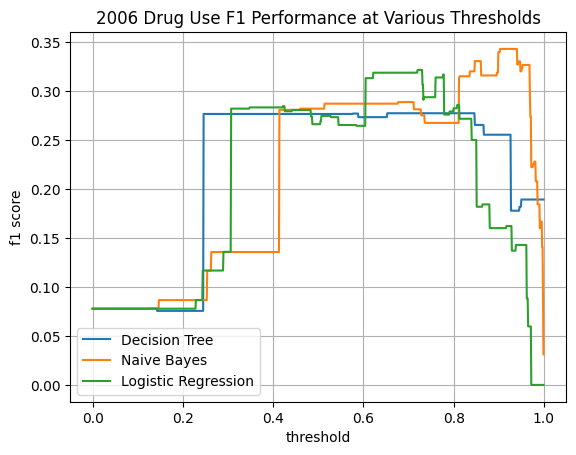

In [119]:
plot_f1_search(du_six_tree_score, 
               du_six_bayes_score, 
               du_six_logit_score,
               "2006 Drug Use F1 Performance at Various Thresholds")

2006 DEMOGRAPHIC VARIABLES

In [120]:
#2006 Demogra dtree
dm_six_tree_final = tree_pipe(5,2,.1,.6).fit(dm_six_trainX,dm_six_trainy)
dm_six_tree_score = threshold_search(dm_six_tree_final, dm_six_testX,dm_six_testy)

Threshold=0.501, F-Score = 0.13176470588235298


In [121]:
#2006 Demogra Bayes
dm_six_bayes_final = bayes_pipe(True,5,.1,.6).fit(dm_six_trainX,dm_six_trainy)
dm_six_bayes_score = threshold_search(dm_six_bayes_final,dm_six_testX,dm_six_testy)

Threshold=0.659, F-Score = 0.15789473684210525


In [122]:
#2006 Demogra Logit
dm_six_logit_final = logit_pipe(.001,6,.1,.8).fit(dm_six_trainX,dm_six_trainy)
dm_six_logit_score = threshold_search(dm_six_logit_final,dm_six_testX.astype(float),dm_six_testy)

Threshold=0.7030000000000001, F-Score = 0.17777777777777778


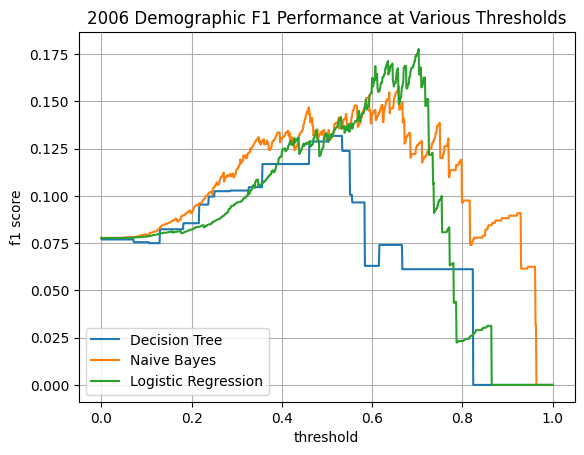

In [123]:
plot_f1_search(dm_six_tree_score, 
               dm_six_bayes_score, 
               dm_six_logit_score,
               "2006 Demographic F1 Performance at Various Thresholds")

In [125]:
#2021 Drug Use dtree
du_tw1_tree_final = tree_pipe(5,3,.4,.7).fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_tree_score = threshold_search(du_tw1_tree_final,du_tw1_testX,du_tw1_testy)

Threshold=0.366, F-Score = 0.49370880766926295


In [126]:
#2021 Drug Use Bayes
du_tw1_bayes_final = bayes_pipe(False,5,.4,.8).fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_bayes_score = threshold_search(du_tw1_bayes_final,du_tw1_testX,du_tw1_testy)

Threshold=0.543, F-Score = 0.49264705882352944


In [127]:
#2021 Drug Use Logit
du_tw1_logit_final = logit_pipe(.01,5,.4,.7).fit(du_tw1_trainX,du_tw1_trainy)
du_tw1_logit_score = threshold_search(du_tw1_logit_final,du_tw1_testX.astype(float),du_tw1_testy)

Threshold=0.392, F-Score = 0.5059399021663172


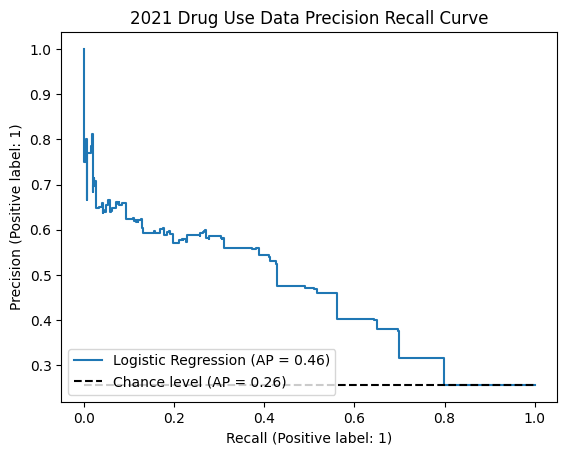

In [136]:
display = PrecisionRecallDisplay.from_estimator(du_tw1_logit_final,du_tw1_testX.astype(float),du_tw1_testy,name="Logistic Regression",plot_chance_level=True)
_ = display.ax_.set_title("2021 Drug Use Data Precision Recall Curve")

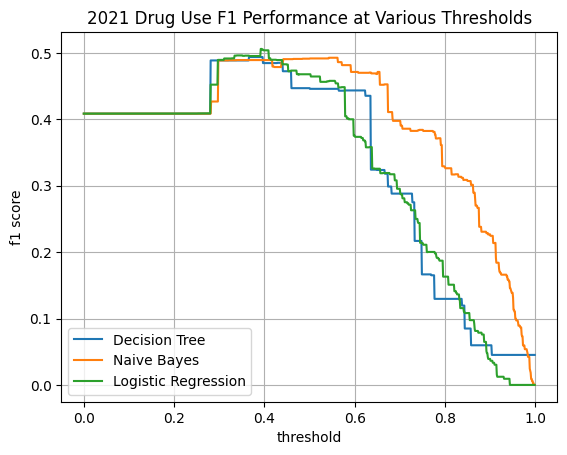

In [130]:
plot_f1_search(du_tw1_tree_score, 
               du_tw1_bayes_score, 
               du_tw1_logit_score,
               "2021 Drug Use F1 Performance at Various Thresholds")

In [148]:
#2021 Demogra dtree
dm_tw1_tree_final = tree_pipe(5,2,.4,.9).fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_tree_score = threshold_search(dm_tw1_tree_final,dm_tw1_testX,dm_tw1_testy)

Threshold=0.44, F-Score = 0.43564356435643564


In [149]:
#2021 Demogra Bayes
dm_tw1_bayes_final = bayes_pipe(True,6,.5,.6).fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_bayes_score = threshold_search(dm_tw1_bayes_final, dm_tw1_testX, dm_tw1_testy)

Threshold=0.263, F-Score = 0.44853635505193573


In [150]:
#2021 Demogra Logit
dm_tw1_logit_final = logit_pipe(.0001,2,.4,.7).fit(dm_tw1_trainX,dm_tw1_trainy)
dm_tw1_logit_score = threshold_search(dm_tw1_logit_final,dm_tw1_testX.astype(float),dm_tw1_testy)

Threshold=0.374, F-Score = 0.45750988142292487


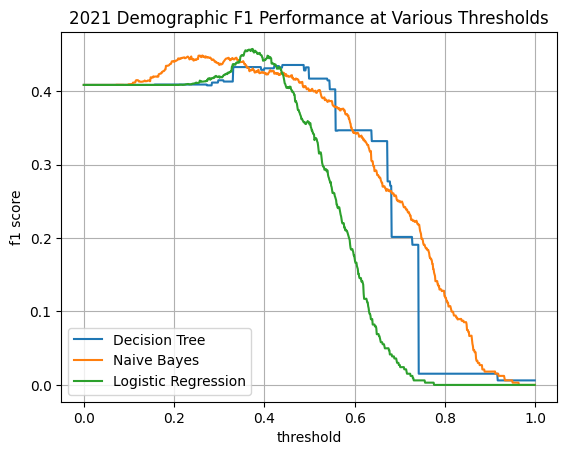

In [151]:
plot_f1_search(dm_tw1_tree_score, 
               dm_tw1_bayes_score, 
               dm_tw1_logit_score,
               "2021 Demographic F1 Performance at Various Thresholds")

Interpretation of Model Coefficients - Logistic Regression

coef_six:  [1.2526098559304653, 1.1713958482754128, 3.756306018390599, 2.5848778148423626, 5.797510103503921, 0.8765622231923171, 20.05659805904674, 4.8153831086876355, 3.253570752392844]
coef_tw1:  [1.6493279148290525, 0.9305454814076751, 1.2894722206691374, 2.0563288306742353, 0.8640336861409535, 0.6832286266910947, 3.548209882948797, 1.6915925322321028, 2.6349597851713478]


<Axes: title={'center': 'Drug Use Model Coefficients from 2006 to 2021'}>

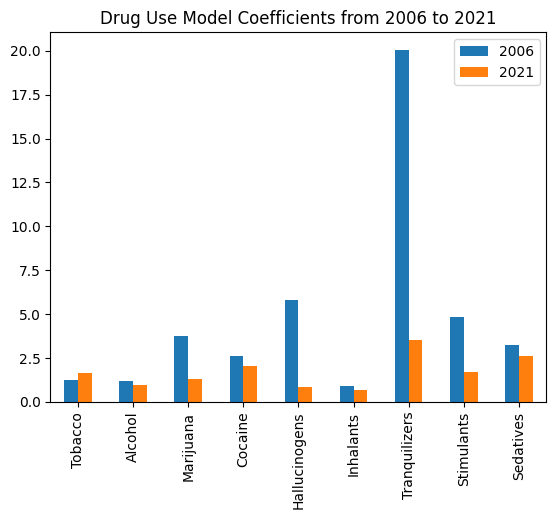

In [155]:
drug_names = ['Tobacco','Alcohol','Marijuana','Cocaine','Hallucinogens','Inhalants','Tranquilizers',
              'Stimulants','Sedatives']

#lsix = [du_six_logit_final['class'].intercept_.tolist(), 
#     du_six_logit_final['class'].coef_.tolist()[0]]

#ltw1 = [du_tw1_logit_final['class'].intercept_.tolist(),
#        du_tw1_logit_final['class'].coef_.tolist()[0]]

#coef_six = np.exp([item for sublist in lsix for item in sublist]).tolist()
#coef_tw1 = np.exp([item for sublist in ltw1 for item in sublist]).tolist()

coef_six = np.exp(du_six_logit_final['class'].coef_.tolist()[0]).tolist()
coef_tw1 = np.exp(du_tw1_logit_final['class'].coef_.tolist()[0]).tolist()

data = {'2006':coef_six, '2021':coef_tw1}

print('coef_six: ',coef_six)
print('coef_tw1: ',coef_tw1)

du_results = pd.DataFrame(data=data,index = drug_names)
du_results.plot.bar(title='Drug Use Model Coefficients from 2006 to 2021')


coef_six:  [0.8371030469208611, 0.7290493454161697, 0.8980955393824358, 0.9636676793600804, 1.1694103465558363, 1.1609908598092704, 0.5356506194762997, 0.6273423585429655]
coef_tw1:  [0.9588227505662315, 0.9585804806217393, 0.9245573624329654, 1.0556394959637199, 1.407173486684088, 1.0656218754161195, 1.4977824304601042, 0.6303179391799846]


<Axes: title={'center': 'Demographic Model Coefficients from 2006 to 2021'}>

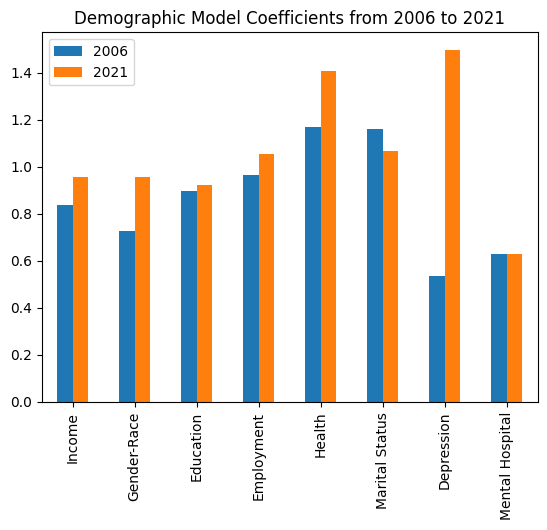

In [156]:
#"INCOME","SEXRACE","EDUCCAT2","EMPSTATY","HEALTH2","IRMARIT","AJAMDEYR","AMHINP2"
demogr_data = ['Income','Gender-Race','Education','Employment','Health',
              'Marital Status','Depression','Mental Hospital']

#lsix = [dm_six_logit_final['class'].intercept_.tolist(), 
#     dm_six_logit_final['class'].coef_.tolist()[0]]

#ltw1 = [dm_tw1_logit_final['class'].intercept_.tolist(),
#        dm_tw1_logit_final['class'].coef_.tolist()[0]]

#coef_six = np.exp([item for sublist in lsix for item in sublist]).tolist()
#coef_tw1 = np.exp([item for sublist in ltw1 for item in sublist]).tolist()

coef_six = np.exp(dm_six_logit_final['class'].coef_.tolist()[0]).tolist()
coef_tw1 = np.exp(dm_tw1_logit_final['class'].coef_.tolist()[0]).tolist()

data = {'2006':coef_six, '2021':coef_tw1}

print('coef_six: ',coef_six)
print('coef_tw1: ',coef_tw1)

dm_results = pd.DataFrame(data=data,index = demogr_data)
dm_results.plot.bar(title='Demographic Model Coefficients from 2006 to 2021')

In [207]:
def value_finder(list,value):
    index = []
    for x in range(len(list)):
        if list.iloc[x]==value:
            index.append(x)
    return index
    

In [245]:
def PCA_scatter_plot(X,y,title,labels):
    scaler = StandardScaler()
    scaler.fit(X)
    X=scaler.transform(X)
    pca_obj = PCA()
    pca_obj.fit(X,y)
    x_new = pca_obj.transform(X)
    coeff=pca_obj.components_
    n=coeff.shape[0]
    
    
    #pca_obj = PCA(n_components=2).fit_transform(X)
    fig,ax = plt.subplots()
    
    ax.scatter(rand_jitter(np.array([x[0] for x in x_new.tolist()])[value_finder(y,0)].tolist()),
                rand_jitter(np.array([x[1] for x in x_new.tolist()])[value_finder(y,0)].tolist()),
               c="red",
                alpha=.25,
                label="non-user"
               )
    ax.scatter(rand_jitter(np.array([x[0] for x in x_new.tolist()])[value_finder(y,1)].tolist()),
                rand_jitter(np.array([x[1] for x in x_new.tolist()])[value_finder(y,1)].tolist()),
               c="blue",
                alpha=.25,
                label="user"
               )
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0]*9, coeff[i,1]*9,color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]*9, coeff[i,1]*9, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]*9, coeff[i,1]*9, labels[i], color = 'k', ha = 'center', va = 'center')

    ax.grid()
    ax.legend()
    ax.set_xlabel("first principal component")
    ax.set_ylabel("second principal component")
    ax.set_title(title)
    plt.show()

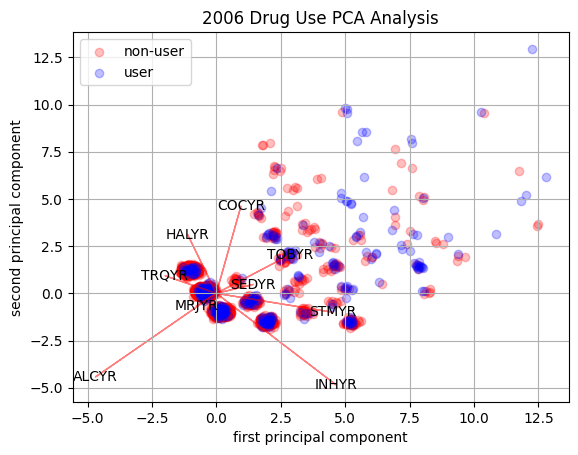

In [246]:
PCA_scatter_plot(du_six_X,du_six_y,"2006 Drug Use PCA Analysis",du_six_final)

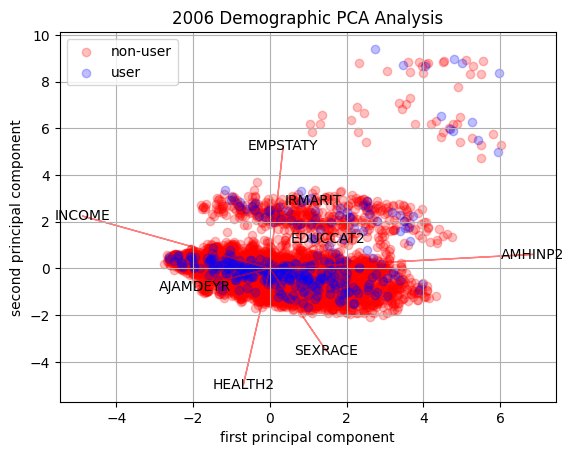

In [247]:
PCA_scatter_plot(dm_six_X,dm_six_y,"2006 Demographic PCA Analysis",dm_six_final)

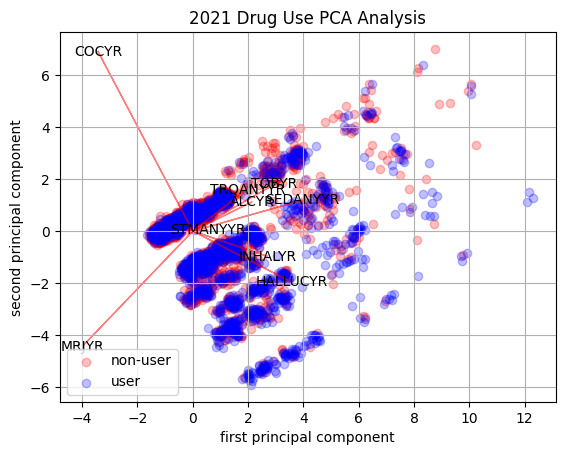

In [249]:
PCA_scatter_plot(du_tw1_X,du_tw1_y,"2021 Drug Use PCA Analysis",du_tw1_final)

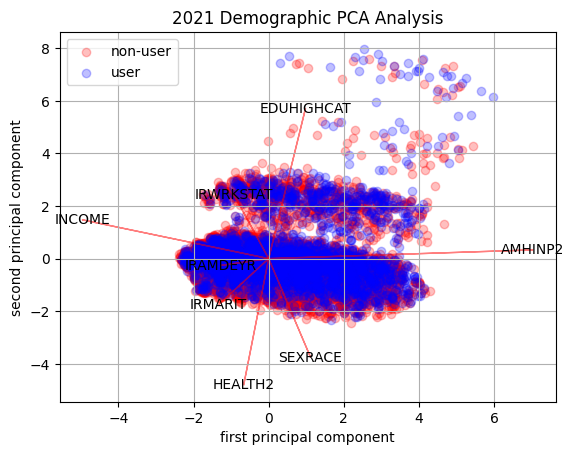

In [250]:
PCA_scatter_plot(dm_tw1_X,dm_tw1_y,"2021 Demographic PCA Analysis",dm_tw1_final)